In [ ]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Initialize Weights & Biases for logging
wandb.init(project="fashion-mnist-visualization11", name="data-analysis")

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Log dataset sizes
wandb.log({
    "Training Samples": train_images.shape[0],
    "Testing Samples": test_images.shape[0],
})

# Define category names for Fashion-MNIST classes
fashion_categories = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Compute class frequencies in training data
unique_labels, label_counts = np.unique(train_labels, return_counts=True)

# Log class-wise distribution
wandb.log({"Class Distribution": wandb.Table(columns=["Category", "Count"],
                                             data=list(zip(fashion_categories, label_counts)))})

# Prepare example images for each category
image_table = wandb.Table(columns=["Category", "Image"])

for class_id in range(10):  # Iterate over all categories
    sample_index = np.where(train_labels == class_id)[0][0]  # Select a sample index
    sample_image = train_images[sample_index]

    # Add the selected image to the W&B table
    image_table.add_data(fashion_categories[class_id], wandb.Image(sample_image))

# Log the example images
wandb.log({"Sample Images": image_table})

# Close the Weights & Biases session
wandb.finish()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ma23m007 (ma23m007-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Testing Samples,▁
Training Samples,▁
Testing Samples,10000
Training Samples,60000


In [ ]:
!wandb online

W&B online. Running your script from this directory will now sync to the cloud.


In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Activation Functions

def logistic(x):
    return 1 / (1 + np.exp(-x))

def hyperbolic(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Weight Initialization
def init_params(input_dim, output_dim):
    weights = np.random.randn(input_dim, output_dim) * np.sqrt(2.0 / (input_dim + output_dim))
    print(f"Initialized Weights: {weights.shape}")  # Sanity check
    return weights

# Feedforward Neural Network
class MultiLayerModel:
    def __init__(self, input_dim, layer_sizes):
        self.layer_sizes = layer_sizes
        self.weights = [init_params(input_dim, layer_sizes[0])] + \
                       [init_params(layer_sizes[i], layer_sizes[i + 1]) for i in range(len(layer_sizes) - 1)]
        self.biases = [np.zeros((1, size)) for size in layer_sizes]

        print("\nSanity Check: Bias Shapes")
        for i, b in enumerate(self.biases):
            print(f"Layer {i+1} Bias Shape: {b.shape}")

    def forward_pass(self, X):
        self.layer_outputs = [X]
        # print("\nSanity Check: Forward Pass")
        # print(f"Input Shape: {X.shape}, Min: {X.min()}, Max: {X.max()}")

        for i in range(len(self.layer_sizes) - 1):

            X = np.dot(X, self.weights[i]) + self.biases[i] #z=X*W+b
            X=relu(X)
            self.layer_outputs.append(X)

        X = np.dot(X, self.weights[-1]) + self.biases[-1]
        X = softmax(X)
        self.layer_outputs.append(X)

        return X

# Load Dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_test = X_test.reshape(-1, 784) / 255.0  # Normalize and flatten


# Initialize Model
model = MultiLayerModel(input_dim=784, layer_sizes=[128, 64, 10])

# Predict and Print Probability Distribution for a Sample
sample_index = 1000  # Change this index to test different images
sample_image = X_test[sample_index].reshape(1, -1)

predicted_probs = model.forward_pass(sample_image)

print("\nPredicted Probability Distribution:", predicted_probs)


Initialized Weights: (784, 128)
Initialized Weights: (128, 64)
Initialized Weights: (64, 10)

Sanity Check: Bias Shapes
Layer 1 Bias Shape: (1, 128)
Layer 2 Bias Shape: (1, 64)
Layer 3 Bias Shape: (1, 10)

Predicted Probability Distribution: [[0.07365978 0.12757392 0.03146623 0.10756228 0.22899075 0.02456382
  0.10766705 0.04493441 0.21592502 0.03765674]]


In [ ]:
import wandb

wandb.login(key="999fe4f321204bd8f10135f3e40de296c23050f9")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ma23m007 (ma23m007-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Create sweep with ID: s6fi06ko
Sweep URL: https://wandb.ai/ma23m007-iit-madras/fashion_emnist-test13/sweeps/s6fi06ko


wandb: Agent Starting Run: 2zd0u23a with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	layer_size: 512
wandb: 	lr: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.001
wandb: 	weight_init: random
wandb: Currently logged in as: ma23m007 (ma23m007-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Sanity Check: Bias Shapes
Layer 1 Bias Shape: (1, 512)
Layer 2 Bias Shape: (1, 512)
Layer 3 Bias Shape: (1, 512)
Layer 4 Bias Shape: (1, 512)
Layer 5 Bias Shape: (1, 512)
Layer 6 Bias Shape: (1, 10)
Epoch 1/10 - Loss: 1.1725 - Train Acc: 0.6284 - Val Acc: 0.6140 - Val Loss: 0.9210
Epoch 2/10 - Loss: 0.8583 - Train Acc: 0.7003 - Val Acc: 0.6892 - Val Loss: 0.8135
Epoch 3/10 - Loss: 0.7818 - Train Acc: 0.7099 - Val Acc: 0.6942 - Val Loss: 0.7847
Epoch 4/10 - Loss: 0.7294 - Train Acc: 0.7516 - Val Acc: 0.7368 - Val Loss: 0.7227
Epoch 5/10 - Loss: 0.6929 - Train Acc: 0.7635 - Val Acc: 0.7487 - Val Loss: 0.6988
Epoch 6/10 - Loss: 0.6526 - Train Acc: 0.7734 - Val Acc: 0.7587 - Val Loss: 0.6740
Epoch 7/10 - Loss: 0.6246 - Train Acc: 0.7912 - Val Acc: 0.7727 - Val Loss: 0.6274
Epoch 8/10 - Loss: 0.5867 - Train Acc: 0.7969 - Val Acc: 0.7763 - Val Loss: 0.6028
Epoch 9/10 - Loss: 0.5521 - Train Acc: 0.8085 - Val Acc: 0.7968 - Val Loss: 0.5690
Epoch 10/10 - Loss: 0.5249 - Train Acc: 0.8142 - Val 

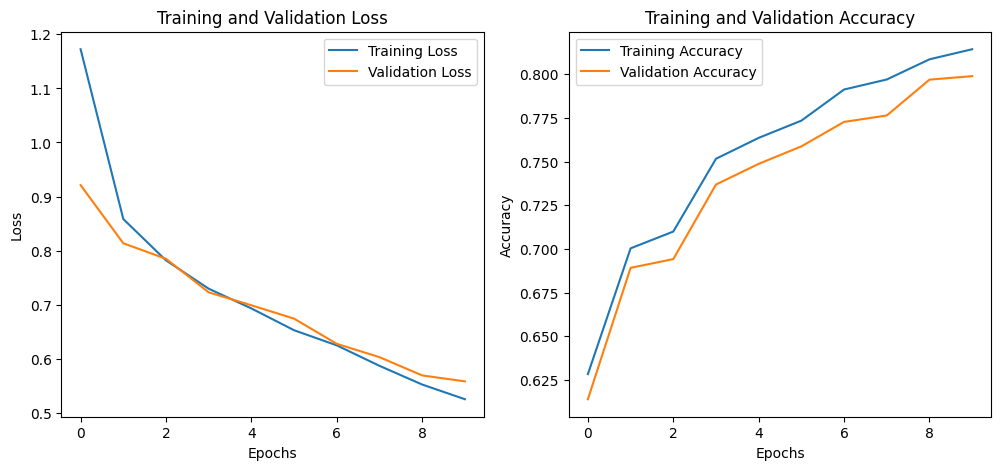

Epochs,▁▂▃▃▄▅▆▆▇█
Training Accuracy,▁▄▄▆▆▆▇▇██
Training Loss,█▅▄▃▃▂▂▂▁▁
Validation Accuracy,▁▄▄▆▆▆▇▇██
Validation Loss,█▆▅▄▄▃▂▂▁▁
Epochs,10
Training Accuracy,0.81424
Training Loss,0.52495
Validation Accuracy,0.79883
Validation Loss,0.55796


In [1]:
import numpy as np
import wandb
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

# Activation Functions and Derivatives
def logistic(x):
    return 1 / (1 + np.exp(-x))

def logistic_grad(a):
    return a * (1 - a)

def hyperbolic(x):
    return np.tanh(x)

def hyperbolic_grad(a):
    return 1 - np.tanh(a) ** 2

def relu(x):
    return np.maximum(0, x)

def relu_grad(a):
    return np.where(a > 0, 1, 0)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Loss Function
def compute_loss(y_target, y_predicted):
    m = y_target.shape[0]
    return -np.sum(y_target * np.log(y_predicted + 1e-8)) / m

def accuracy(y_target, y_predicted):
    return np.mean(np.argmax(y_target, axis=1) == np.argmax(y_predicted, axis=1))

# Weight Initialization
def init_params(input_dim, output_dim, method="random"):
  #Initialize weight matrices based on the chosen method

    if method == "random":
        return np.random.randn(input_dim, output_dim) * 0.01
    elif method == "xavier":
        return np.random.randn(input_dim, output_dim) * np.sqrt(2.0 / (input_dim + output_dim))
    elif method == "random_normal":
        return np.random.normal(loc=0.0, scale=0.01, size=(input_dim, output_dim))
    elif method == "xavier_uniform":
        limit = np.sqrt(6.0 / (input_dim + output_dim))
        return np.random.uniform(low=-limit, high=limit, size=(input_dim, output_dim))
    elif method == "xavier_normal":
        return np.random.normal(loc=0.0, scale=np.sqrt(2.0 / (input_dim + output_dim)), size=(input_dim, output_dim))

# Base Optimizer Class
class GradientUpdater:
  #Base class for gradient-based optimizers
    def __init__(self, lr, weight_decay=0.0):
        self.lr = lr
        self.weight_decay = weight_decay

    def apply_gradients(self, params, grads):
        raise NotImplementedError

# Optimizers
class BasicUpdater(GradientUpdater):
#Applies standard gradient descent with weight decay
    def apply_gradients(self, params, grads):
        return params - self.lr * (grads + self.weight_decay * params)

class MomentumUpdater(GradientUpdater):
    def __init__(self, lr, beta=0.9, weight_decay=0.0):
        super().__init__(lr, weight_decay)
        self.beta = beta # Momentum factor
        self.velocity = None  # Stores previous gradients

    def apply_gradients(self, params, grads):
        if self.velocity is None:
            self.velocity = np.zeros_like(params)   # Initialize velocity
        self.velocity = self.beta * self.velocity + (1 - self.beta) * grads
        return params - self.lr * (self.velocity + self.weight_decay * params)

class NesterovUpdater(MomentumUpdater):
    def apply_gradients(self, params, grads):
        if self.velocity is None:
            self.velocity = np.zeros_like(params)
        lookahead = params - self.beta * self.velocity # Lookahead step
        self.velocity = self.beta * self.velocity + self.lr * grads
        return lookahead - self.velocity - self.lr * self.weight_decay * params

class RMSUpdater(GradientUpdater):
    def __init__(self, lr, beta=0.99, epsilon=1e-8, weight_decay=0.0):
        super().__init__(lr, weight_decay)
        self.beta = beta # Decay rate for squared gradient accumulation
        self.epsilon = epsilon #Small constant for numerical stability
        self.squared_avg = None # Stores moving average of squared gradients

    def apply_gradients(self, params, grads):
        if self.squared_avg is None:
            self.squared_avg = np.zeros_like(params)
        self.squared_avg = self.beta * self.squared_avg + (1 - self.beta) * grads ** 2
        return params - self.lr * grads / (np.sqrt(self.squared_avg) + self.epsilon) - self.lr * self.weight_decay * params

class AdaptiveUpdater(GradientUpdater):
  #Adaptive moment estimation (Adam) optimizer
    def __init__(self, lr, beta1=0.9, beta2=0.999, epsilon=1e-8, weight_decay=0.0):
        super().__init__(lr, weight_decay)
        self.beta1 = beta1  # First moment decay rate
        self.beta2 = beta2  # Second moment decay rate
        self.epsilon = epsilon
        self.m = None # First moment estimate
        self.v = None # Second moment estimate
        self.t = 0  # Time step

    def apply_gradients(self, params, grads):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)

        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads   # Compute biased first moment estimate
        self.v = self.beta2 * self.v + (1 - self.beta2) * grads ** 2  # Compute biased second moment estimate

        # Bias correction
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        # Update parameters
        return params - self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon) - self.lr * self.weight_decay * params

class NesterovAdaptiveUpdater(AdaptiveUpdater):
   #Adam optimizer with Nesterov acceleration for faster convergence
    def apply_gradients(self, params, grads):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)

        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * grads ** 2

        # Bias correction
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        # Compute Nesterov momentum term
        m_nesterov = self.beta1 * m_hat + (1 - self.beta1) * grads

        return params - self.lr * m_nesterov / (np.sqrt(v_hat) + self.epsilon)

# Neural Network Class
class MultiLayerModel:
    def __init__(self, input_dim, layer_sizes, activations, optimizer="adam", lr=0.001, weight_init="xavier", weight_decay=0.0):
        self.layer_sizes = layer_sizes

        #activation and its derivatives
        self.activations = [relu if act == "relu" else hyperbolic if act == "tanh" else logistic for act in activations]
        self.activation_grads = [relu_grad if act == "relu" else hyperbolic_grad if act == "tanh" else logistic_grad for act in activations]
        #weights and biases initialization
        self.weights = [init_params(input_dim, layer_sizes[0], weight_init)] + [init_params(layer_sizes[i], layer_sizes[i+1], weight_init) for i in range(len(layer_sizes)-1)]
        self.biases = [np.zeros((1, size)) for size in layer_sizes]


        self.loss_history = [] # storage for loss
        self.learning_rate = lr
        self.weight_decay = weight_decay #L2 regularisor

        print("\nSanity Check: Bias Shapes")
        for i, b in enumerate(self.biases):
            print(f"Layer {i+1} Bias Shape: {b.shape}")


        optimizers = {
            "sgd": BasicUpdater,
            "momentum": MomentumUpdater,
            "nag": NesterovUpdater,
            "rmsprop": RMSUpdater,
            "adam": AdaptiveUpdater,
            "nadam": NesterovAdaptiveUpdater
            }


        self.optimizers = [optimizers[optimizer](lr, weight_decay=weight_decay) for _ in layer_sizes]
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []



    def forward_pass(self, X):
        self.layer_outputs = [X]

        for i in range(len(self.layer_sizes)):
            X = np.dot(X, self.weights[i]) + self.biases[i] #z=X*W+b
            X = softmax(X) if i == len(self.layer_sizes) - 1 else self.activations[i](X)
            self.layer_outputs.append(X)
        return X

    def backward_pass(self, y_target):
        output_grad = self.layer_outputs[-1] - y_target  # Compute the gradient of the loss of output layer
        grads = [output_grad]

        # Backpropagate the error through the hidden layers
        for i in range(len(self.layer_sizes) - 1, 0, -1):
            output_grad = np.dot(output_grad, self.weights[i].T) * self.activation_grads[i - 1](self.layer_outputs[i])
            grads.insert(0, output_grad)


      # Update weights and biases using the computed gradients
        for i in range(len(self.layer_sizes)):
            self.weights[i] = self.optimizers[i].apply_gradients(self.weights[i], np.dot(self.layer_outputs[i].T, grads[i]))
            self.biases[i] -= self.learning_rate * np.sum(grads[i], axis=0, keepdims=True)

    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32, grad_type="mini-batch"):
        num_samples = X_train.shape[0]


      # Determine batch size based on gradient update type
        if grad_type == "stochastic":
            batch_size = 1
        elif grad_type == "vanilla":
            batch_size = num_samples
        elif grad_type == "mini-batch":
            batch_size = min(batch_size, num_samples)
        else:
            raise ValueError("Invalid grad_type. Choose from 'stochastic', 'vanilla', or 'mini-batch'.")


        for epoch in range(epochs):
          # Shuffle data to avoid training bias
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]

            epoch_loss = 0
            num_batches = 0

            # Iterate through the dataset in mini-batches
            for i in range(0, num_samples, batch_size):
                X_batch, y_batch = X_train[i:i + batch_size], y_train[i:i + batch_size]
                y_pred = self.forward_pass(X_batch)

                # Compute loss for the batch
                loss = compute_loss(y_batch, y_pred)
                epoch_loss += loss
                num_batches += 1

                # Perform backpropagation to update weights
                self.backward_pass(y_batch)

            avg_loss = epoch_loss / num_batches # average loss since batches
            train_acc = accuracy(y_train, self.forward_pass(X_train))
            val_acc = accuracy(y_val, self.forward_pass(X_val))
            val_loss = compute_loss(y_val, self.forward_pass(X_val))

            # appending for plot metrics visualization
            self.train_loss.append(avg_loss)
            self.train_acc.append(train_acc)
            self.val_loss.append(val_loss)
            self.val_acc.append(val_acc)
            self.loss_history.append(avg_loss)
            print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Train Acc: {train_acc:.4f} - Val Acc: {val_acc:.4f} - Val Loss: {val_loss:.4f}")

            # Log metrics for wandb
            wandb.log({
                'Training Loss': avg_loss,
                'Training Accuracy': train_acc,
                'Validation Loss': val_loss,
                'Validation Accuracy': val_acc,
                'Epochs': epoch+1
            })

    def evaluate(self, X_test, y_test):
        y_pred = self.forward_pass(X_test) # Perform forward pass on test data
        test_acc = accuracy(y_test, y_pred) # Compute test accuracy
        print(f"Test Accuracy: {test_acc:.4f}")
        return test_acc

    def plot_metrics(self):
        plt.figure(figsize=(12, 5))

        # Plot training and validation loss over epochs
        plt.subplot(1, 2, 1)
        plt.plot(self.train_loss, label='Training Loss')
        plt.plot(self.val_loss, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        # Plot training and validation accuracy over epochs
        plt.subplot(1, 2, 2)
        plt.plot(self.train_acc, label='Training Accuracy')
        plt.plot(self.val_acc, label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        plt.show()

# WandB Sweep Configuration
sweep_config = {
    'method': 'bayes',
    'name': 'fashion_mnist_sweep',
    'metric': {'goal': 'maximize', 'name': 'Validation Accuracy'},
    'parameters': {
        'epochs': {'values': [5, 10]},
        'hidden_layers': {'values': [3, 4, 5]},
        'layer_size': {'values': [32,64,128, 256,512]},
        'optimizer': {'values': ['sgd', 'momentum', 'nag', 'rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [32, 64,128]},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']},
        'lr': {'values': [1e-3, 1e-4]},
        'weight_init': {'values': ['random', 'xavier','random_normal','xavier_normal','xavier_uniform']},
        'weight_decay': {'values': [0.0, 0.0001, 0.001,0.0005]}
    }
}




def train_sweep():
    with wandb.init() as run:
        config = wandb.config

        # Constructing run name for better tracking
        run_name = (
            "-ac_" + config.activation +
            "-hs_" + str(config.layer_size) +
            "-epc_" + str(config.epochs) +
            "-hl_" + str(config.hidden_layers) +
            "-eta_" + str(config.lr) +
            "-optmz_" + config.optimizer +
            "-batch_" + str(config.batch_size) +
            "-wght_" + config.weight_init
        )
        wandb.run.name = run_name

        # Defining model architecture
        layer_sizes = [config.layer_size] * config.hidden_layers  # Hidden layers
        activations = [config.activation] * config.hidden_layers  # Activation functions

        model = MultiLayerModel(
            input_dim=784,
            layer_sizes=layer_sizes + [10],  # Output layer added
            activations=activations + ['softmax'],  # Softmax for classification
            optimizer=config.optimizer,
            lr=config.lr,
            weight_init=config.weight_init
        )

        # Training the model
        model.train(X_train, y_train, X_val, y_val, epochs=config.epochs, batch_size=config.batch_size)
        model.plot_metrics()

    wandb.finish()



# # Load Dataset and Split
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train.reshape(-1, 784) / 255.0, X_test.reshape(-1, 784) / 255.0 # flatten and normalizing
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10) # Convert class labels to one-hot encoding
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


# Start Sweep
sweep_id = wandb.sweep(sweep_config, project='fashion_emnist-gross_entropy')
wandb.agent(sweep_id, train_sweep, count=1)

7. confusion matrix

In [ ]:
# Best model configuration
best_model_config = {
    'epochs': 10,
    'hidden_layers': 5,
    'layer_size': 512,
    'optimizer': 'nadam',
    'batch_size': 32,
    'activation': 'relu',
    'lr': 1e-4,
    'weight_init': 'xavier_uniform'
}

# Define the model architecture
hidden_layer_sizes = [best_model_config['layer_size']] * best_model_config['hidden_layers']  # Hidden layers
activations = [best_model_config['activation']] * best_model_config['hidden_layers']  # Activation functions

# Initialize the model
best_model = MultiLayerModel(
    input_dim=784,
    layer_sizes=hidden_layer_sizes + [10],  # Output layer added
    activations=activations + ['softmax'],  # Softmax for classification
    optimizer=best_model_config['optimizer'],
    lr=best_model_config['lr'],
    weight_init=best_model_config['weight_init']
)

# Train the model
best_model.train(X_train, y_train, X_val, y_val, epochs=best_model_config['epochs'], batch_size=best_model_config['batch_size'])

# Evaluate the model on the test set
test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions
y_pred = best_model.forward_pass(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix with class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Class Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()